

# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import datetime
import time
import openweathermapy.core as owm
import sys
from matplotlib.pyplot import *
# Import API key
from api_keys import api_key 



# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy


# Output File (CSV)
output_data_file = "cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
num = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)




# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
   
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        

#Print the city count to confirm sufficient count

len(cities)


617

In [3]:
print('Beginning Data Retrieval')
print ('---------------------------')
i = 1
for city in cities:
    try:
       
        print(f'Processing Record {i} of Set 1  | {city}')
        i = i+1
    except:
        continue

Beginning Data Retrieval
---------------------------
Processing Record 1 of Set 1  | mataura
Processing Record 2 of Set 1  | hithadhoo
Processing Record 3 of Set 1  | belushya guba
Processing Record 4 of Set 1  | ponta do sol
Processing Record 5 of Set 1  | kodiak
Processing Record 6 of Set 1  | naze
Processing Record 7 of Set 1  | coquimbo
Processing Record 8 of Set 1  | albany
Processing Record 9 of Set 1  | ushuaia
Processing Record 10 of Set 1  | longyearbyen
Processing Record 11 of Set 1  | kholmogory
Processing Record 12 of Set 1  | nizhneyansk
Processing Record 13 of Set 1  | tsihombe
Processing Record 14 of Set 1  | jamestown
Processing Record 15 of Set 1  | mount isa
Processing Record 16 of Set 1  | hilo
Processing Record 17 of Set 1  | mar del plata
Processing Record 18 of Set 1  | kwekwe
Processing Record 19 of Set 1  | saint-philippe
Processing Record 20 of Set 1  | padang
Processing Record 21 of Set 1  | cherskiy
Processing Record 22 of Set 1  | tateyama
Processing Record 

In [4]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
#lat_lngs = []
#cities = []


# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="

#cities = ["Paris", "London", "Oslo", "Beijing","Lompoc","klaksvik","bisignano","hilo","rikitea"]

# set up lists to hold reponse info
final_city = []
lat = []
lon = []
temp = []
cloud = []
humid = []
Max_temp = []
wind_speed = []
city_id = []
date = []
sys = []

#converting julian date and time of affected cities
#date = [data.get ("dt") for data in weather_by_city]
#New_Date =(date.to_datetime((date // 1000).astype(str)) + date.to_timedelta(date % 1000, unit='D')
#print(New_Date)




# Loop through the list of cities and perform a request for data on each
i = 0
for city in cities:
    r = requests.get(query_url+city)
    if (r.status_code == requests.codes.ok):
        response = r.json()
        #print(response)
                    
    
        lat.append(response['coord']['lat'])
        lon.append(response['coord']['lon'])
        temp.append(response['main']['temp'])
        cloud.append(response['clouds']['all'])
        humid.append(response['main']['humidity'])
        Max_temp.append(response['main']['temp_max'])
        wind_speed.append(response['wind']['speed'])
        sys.append(response['sys']['country'])
        date.append(response['dt'])
        
        final_city.append(city)
        #print(city)
    else:
        print(f'Error! - {city}')
    
    i = i+1
    if (i > 300):
        break
    
print('done!')
    

Error! - belushya guba
Error! - nizhneyansk
Error! - tsihombe
Error! - nguiu
Error! - rungata
Error! - grand river south east
Error! - illoqqortoormiut
Error! - barentsburg
Error! - attawapiskat
Error! - burica
Error! - mullaitivu
Error! - taolanaro
Error! - dolbeau
Error! - olafsvik
Error! - tumannyy
Error! - grand centre
Error! - sentyabrskiy
Error! - amderma
Error! - subacius
Error! - umm durman
Error! - samusu
Error! - kuche
Error! - tidore
Error! - marcona
Error! - khonuu
Error! - chardara
Error! - gorno-chuyskiy
Error! - labutta
Error! - longlac
done!


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
weather_dict = {
    "City": final_city,
    "Country":sys,
    "Date":date,
    "Latitude": lat,
    "Longitude":lon,
    "Temperature": temp,
    "Cloudiness":cloud,
    "Humidity":humid,
    "Max Temp.":Max_temp,
    "Wind Speed":wind_speed
 }


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
#Exporting the DataFrame as a CSV file

weather_data = pd.DataFrame(weather_dict)
weather_data.to_csv("cities.csv", sep = ",")



In [20]:
weather_data = pd.DataFrame(weather_dict)
weather_data.head(10)

,City,Country,Date,Latitude,Longitude,Temperature,Cloudiness,Humidity,Max Temp.,Wind Speed
0,mataura,NZ,1547524317,-46.19,168.86,67.21,0,66,67.21,8.08
1,hithadhoo,MV,1547524582,-0.60,73.08,82.33,88,100,82.33,4.16
2,ponta do sol,BR,1547524856,-20.63,-46.00,69.37,56,80,69.37,4.27
3,kodiak,US,1547523600,39.95,-94.76,30.11,90,100,32.00,8.05
4,naze,NG,1547525146,5.43,7.07,73.87,0,92,73.87,5.73
5,coquimbo,CL,1547521200,-29.95,-71.34,60.80,0,82,60.80,6.93
6,albany,US,1547521080,42.65,-73.75,17.40,40,64,19.40,2.93
7,ushuaia,AR,1547521200,-54.81,-68.31,51.80,40,81,51.80,4.70
8,longyearbyen,NO,1547520600,78.22,15.63,3.20,20,71,3.20,3.36
9,kholmogory,RU,1547523000,64.23,41.65,19.40,90,100,19.40,6.71


In [21]:
#converting julian date and time of affected cities
#Date = [request.get ("dt") for Date in weather_data]
#New_Date =(Date.to_datetime((Date // 1000).astype(str)) + Date.to_timedelta(Date % 1000, unit='D')
#New_Date

SyntaxError: invalid syntax (<ipython-input-21-4dfc749e76f7>, line 4)

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

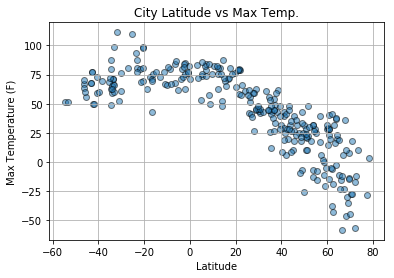

In [12]:
# Build a scatter plot for each data type

plt.scatter(weather_data["Latitude"], weather_data["Max Temp."], marker="o",alpha = ".5", edgecolors = "black" )

# Incorporate the other graph properties
plt.title("City Latitude vs Max Temp.")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
#plt.savefig("TemperatureInWorldCities.png")

# Show plot
plt.show()

#### Latitude vs. Humidity Plot

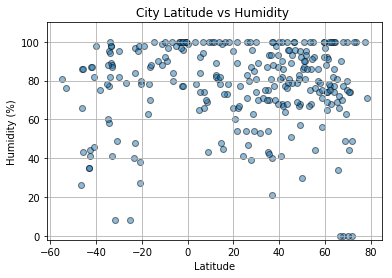

In [13]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Latitude"], weather_data["Humidity"], marker="o",alpha = ".5", edgecolors = "black")

# Incorporate the other graph properties
plt.title("City Latitude vs Humidity ")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.ylim(-2, 110)

# Save the figure
#plt.savefig("TemperatureInWorldCities.png")

# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

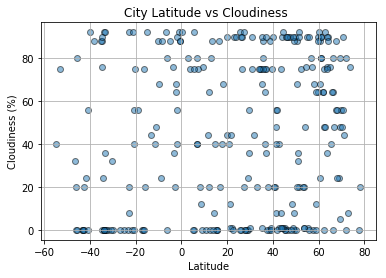

In [14]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Latitude"], weather_data["Cloudiness"], marker="o",alpha = ".5", edgecolors = "black")

# Incorporate the other graph properties
plt.title("City Latitude vs Cloudiness ")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
#plt.savefig("TemperatureInWorldCities.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

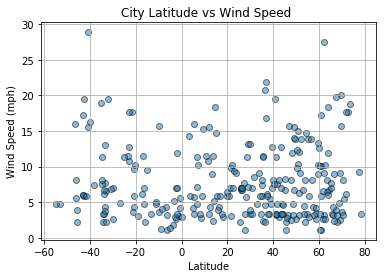

In [15]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Latitude"], weather_data["Wind Speed"], marker="o",alpha = ".5", edgecolors = "black")

# Incorporate the other graph properties
plt.title("City Latitude vs Wind Speed ")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
#plt.savefig("TemperatureInWorldCities.png")

# Show plot
plt.show()

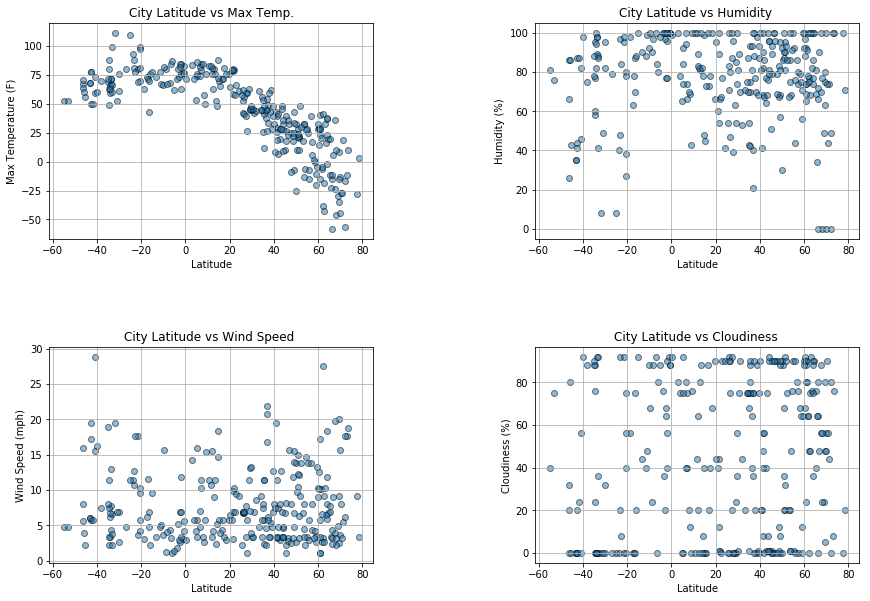

In [16]:

fig = plt.figure()
ax1 = fig.add_subplot(2, 2, 1)
plt.scatter(weather_data["Latitude"], weather_data["Max Temp."], marker="o",alpha = ".5", edgecolors = "black")
ax1.set_title("City Latitude vs Max Temp.")
ax1.set_ylabel("Max Temperature (F)")
ax1.set_xlabel("Latitude")
ax1.grid(True)

ax2 = fig.add_subplot(2,2, 2)
plt.scatter(weather_data["Latitude"], weather_data["Humidity"], marker="o",alpha = ".5", edgecolors = "black")
ax2.set_title("City Latitude vs Humidity ")
ax2.set_ylabel("Humidity (%)")
ax2.set_xlabel("Latitude")
ax2.grid(True)

ax3 = fig.add_subplot(2,2,3)
plt.scatter(weather_data["Latitude"], weather_data["Wind Speed"], marker="o",alpha = ".5", edgecolors = "black")
ax3.set_title("City Latitude vs Wind Speed ")
ax3.set_ylabel("Wind Speed (mph)")
ax3.set_xlabel("Latitude")
ax3.grid(True)

ax4 = fig.add_subplot(2,2,4)
plt.scatter(weather_data["Latitude"], weather_data["Cloudiness"], marker="o",alpha = ".5", edgecolors = "black")
ax4.set_title("City Latitude vs Cloudiness ")
ax4.set_xlabel("Latitude")
ax4.set_ylabel("Cloudiness (%)")
ax4.grid(True)


fig.subplots_adjust(right=2, top=2, wspace=.5, hspace=.5)

fig.savefig("TemperatureInWorldCities.png", bbox_inches="tight")

In [ ]:
Three observable trends based on the data----
1)Humidity goes up with the Latitude.Higher the Latitude higher Humidity .
2)Wind speed does not related to altitude.
3) Cloud accumulation does not related to altitude either. 
